# BVM Actuation Force

Experiment measuring force that reaches desired static pressure.

In [1]:
import sys, io

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
from IPython.core.display import Image, display, HTML

%matplotlib inline

We have measured pressure / weight:

In [5]:
actuation_pressure_weight_samples = {
 "0% @ D=0.7cm": {
  20: 1.4,
  25: 1.8,
  30: 2.2,
  35: 2.7,
  40: 2.8,
 },
 "0% @ D=4.9cm": {
  20: 1.5,
  25: 1.9,
  30: 2.3,
  35: 2.8,
  40: 3.2,
 },
 "0% @ D=6.7cm": {
  20: 1.8,
  25: 2.2,
  30: 2.5,
  35: 3.2,
  40: 3.3,
 },
 "50% @ D=0.7cm": {
  20: 3.0,
  #25: 2.2,
  30: 4.2,
  #35: 3.2,
  40: 5.0,
 },
 "50% @ D=6.7cm": {
  20: 4.0,
  #25: 2.2,
  30: 5.4,
  #35: 3.2,
  40: 6.8,
 },
 "75% @ D=6.7cm": {
  20: 4.6,
  #25: 2.2,
  30: 6.3,
  #35: 3.2,
  40: 7.6,
 },
}

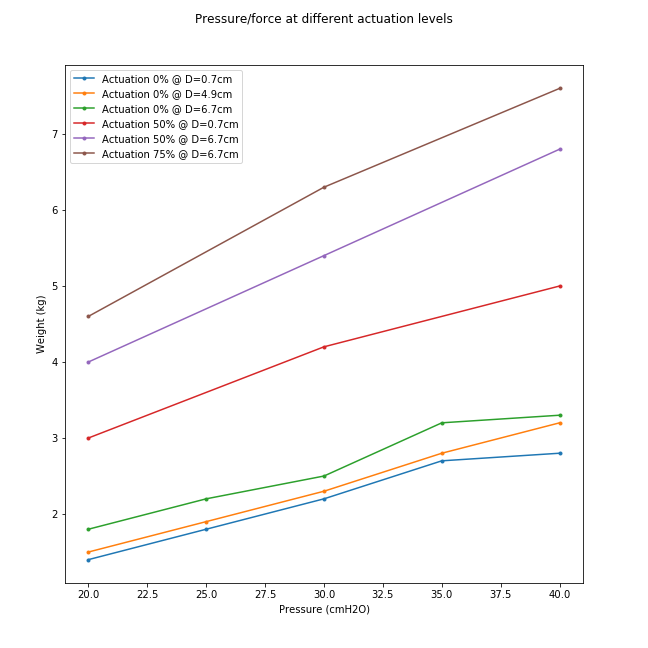

In [6]:
def fig_pw():
    subpcfg = matplotlib.figure.SubplotParams(
     left  =0.10,
     bottom=0.10,
     right =0.90,
     top   =0.90,
     wspace=0.00,
     hspace=0.00,
    )
    figure = matplotlib.figure.Figure(
     facecolor='white',
     edgecolor='white',
     subplotpars=subpcfg,
     figsize=(9,9),
    )

    actuations = actuation_pressure_weight_samples.keys()
    
    axes = figure.add_subplot(1, 1, 1)
    axes.set_xlabel(("Pressure (cmH2O)"))
    axes.set_ylabel(("Weight (kg)"))
    
    for actuation in actuations:
        xs = list()
        ys = list()
        for p, w in sorted(actuation_pressure_weight_samples[actuation].items()):
            xs.append(p)
            ys.append(w)

        axes.plot(xs, ys, ".-", label=f"Actuation {actuation}")
        #print(xs)
        #print(ys)
    
    axes.legend()
    figure.suptitle(f"Pressure/force at different actuation levels")
    
    return figure

fig = fig_pw()
canvasbase = matplotlib.backend_bases.FigureCanvasBase(fig)
figure_canvas = canvasbase._get_output_canvas("png")
f = io.BytesIO()
figure_canvas.print_png(f)
display(Image(data=f.getvalue(), format="png", embed=True))